In [ ]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score

In [ ]:
data_tr1=pd.read_csv("C:/Users/HP/Desktop/MY PROJECTS/MICROSOFT DATA SECURITY/microsoft _data security/new_train_sample.csv")

In [4]:
data_tr1

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,3272416,103079215470,142,93987,15739,2024-06-10T10:25:17.000Z,112,7836,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758414,6701254,1683627184337,36,1001,257479,2024-06-11T19:30:52.000Z,2,2,CommandAndControl,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4758415,5665090,1597727836318,851,31194,1518250,2024-06-09T04:27:41.000Z,1,1,InitialAccess,T1566.002,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758416,1421470,137438957239,12,2419,1203,2024-05-21T23:01:11.000Z,16,1334,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [6]:
data_ts=pd.read_csv("C:/Users/HP/Desktop/MY PROJECTS/MICROSOFT DATA SECURITY/microsoft _data security/GUIDE_Test.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_15292\1589509102.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data_ts=pd.read_csv("C:/Users/HP/Desktop/MY PROJECTS/MICROSOFT DATA SECURITY/microsoft _data security/GUIDE_Test.csv")


In [7]:
data_ts

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [ ]:
list(data_tr1.columns)
list(data_ts.columns)

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City',
 'Usage']

In [14]:
data_tr1.head(1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132,4227,3586,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630


In [13]:
data_tr1= data_tr1.iloc[:, 1:]

In [11]:
data_ts.head(1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private


In [15]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [16]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

HANDLING DATA

In [18]:
(data_tr1.isnull().sum()/(len(data_tr1)))*100

Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.437913
IncidentGrade          0.541672
ActionGrouped         99.407093
ActionGranular        99.407093
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.987542
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFa

In [19]:
(data_ts.isnull().sum()/(len(data_tr1)))*100

Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       48.484685
IncidentGrade          0.000000
ActionGrouped         87.131458
ActionGranular        87.131458
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        86.295172
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFa

In [20]:
threshold= len(data_tr1)* 0.5   # removing 50% above null value
data_tr1=data_tr1.dropna(thresh=threshold,axis=1)

In [21]:
data_tr1.shape

(4758418, 35)

In [22]:
threshold= len(data_ts)* 0.5   # removing 50% above null value
data_ts=data_ts.dropna(thresh=threshold,axis=1)

In [24]:
data_ts.shape

(4147992, 36)

In [27]:
data_tr1.duplicated().sum()

np.int64(0)

In [26]:
data_tr1.drop_duplicates(inplace=True)

In [30]:
data_ts.duplicated().sum()

np.int64(0)

In [29]:
data_ts.drop_duplicates(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15292\1541358511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ts.drop_duplicates(inplace=True)


In [31]:
data_tr1.isnull().sum()

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         24824
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64

In [32]:
data_ts.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
dtype: int64

In [33]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4602224 entries, 0 to 4758417
Data columns (total 35 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   IncidentGrade       object
 9   EntityType          object
 10  EvidenceRole        object
 11  DeviceId            int64 
 12  Sha256              int64 
 13  IpAddress           int64 
 14  Url                 int64 
 15  AccountSid          int64 
 16  AccountUpn          int64 
 17  AccountObjectId     int64 
 18  AccountName         int64 
 19  DeviceName          int64 
 20  NetworkMessageId    int64 
 21  RegistryKey         int64 
 22  RegistryValueName   int64 
 23  RegistryValueData   int64 
 24  ApplicationId       int64 
 25  ApplicationName     int

In [34]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922695 entries, 0 to 4147990
Data columns (total 36 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   IncidentGrade       object
 9   EntityType          object
 10  EvidenceRole        object
 11  DeviceId            int64 
 12  Sha256              int64 
 13  IpAddress           int64 
 14  Url                 int64 
 15  AccountSid          int64 
 16  AccountUpn          int64 
 17  AccountObjectId     int64 
 18  AccountName         int64 
 19  DeviceName          int64 
 20  NetworkMessageId    int64 
 21  RegistryKey         int64 
 22  RegistryValueName   int64 
 23  RegistryValueData   int64 
 24  ApplicationId       int64 
 25  ApplicationName     int

In [35]:
data_tr1["IncidentGrade"].fillna(data_tr1["IncidentGrade"].mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15292\2004624072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_tr1["IncidentGrade"].fillna(data_tr1["IncidentGrade"].mode()[0],inplace=True)


In [36]:
data_tr1.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [37]:
data_ts.IncidentGrade.unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive'], dtype=object)

In [38]:
data_tr1['Timestamp']=pd.to_datetime(data_tr1['Timestamp'])
data_ts['Timestamp']=pd.to_datetime(data_ts['Timestamp'])

C:\Users\HP\AppData\Local\Temp\ipykernel_15292\4201091139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ts['Timestamp']=pd.to_datetime(data_ts['Timestamp'])


In [ ]:
data_tr1['Timestamp'].head()

0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [46]:
data_ts['Timestamp'].head()

0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [47]:
data_tr1["Day"]=data_tr1["Timestamp"].dt.day
data_tr1["Month"]=data_tr1["Timestamp"].dt.month
data_tr1["Year"]=data_tr1["Timestamp"].dt.year
data_tr1["Hour"]=data_tr1["Timestamp"].dt.hour
data_tr1["Time"]=data_tr1["Timestamp"].dt.time

In [48]:
data_ts["Day"]=data_ts["Timestamp"].dt.day
data_ts["Month"]=data_ts["Timestamp"].dt.month
data_ts["Year"]=data_ts["Timestamp"].dt.year
data_ts["Hour"]=data_ts["Timestamp"].dt.hour
data_ts["Time"]=data_ts["Timestamp"].dt.time

C:\Users\HP\AppData\Local\Temp\ipykernel_15292\410110392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ts["Day"]=data_ts["Timestamp"].dt.day
C:\Users\HP\AppData\Local\Temp\ipykernel_15292\410110392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ts["Month"]=data_ts["Timestamp"].dt.month
C:\Users\HP\AppData\Local\Temp\ipykernel_15292\410110392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [49]:
data_tr1.drop("Timestamp",axis=1,inplace=True)   # doprring timestamp column
print(data_tr1.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1709396985476     26       18583   687462          31         813   
1   927712939180     33        5065     3990          38          25   
2  1090921697002    201      150787   807590         419         444   
3  1434519079555    204      108287    28575          44        1233   
4  1005022347708     54      528202  1458226         102       58829   

             Category   IncidentGrade EntityType EvidenceRole  DeviceId  \
0             Malware  BenignPositive       File      Related     98799   
1              Impact  BenignPositive    Machine     Impacted     98799   
2           Execution  BenignPositive    Machine     Impacted     98799   
3  SuspiciousActivity    TruePositive       File      Related     98799   
4        Exfiltration  BenignPositive       File     Impacted     98799   

   Sha256  IpAddress     Url  AccountSid  AccountUpn  AccountObjectId  \
0    1296     360606  160396      441377   

In [50]:
data_ts.drop("Timestamp",axis=1,inplace=True)   # doprring timestamp column
print(data_tr1.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1709396985476     26       18583   687462          31         813   
1   927712939180     33        5065     3990          38          25   
2  1090921697002    201      150787   807590         419         444   
3  1434519079555    204      108287    28575          44        1233   
4  1005022347708     54      528202  1458226         102       58829   

             Category   IncidentGrade EntityType EvidenceRole  DeviceId  \
0             Malware  BenignPositive       File      Related     98799   
1              Impact  BenignPositive    Machine     Impacted     98799   
2           Execution  BenignPositive    Machine     Impacted     98799   
3  SuspiciousActivity    TruePositive       File      Related     98799   
4        Exfiltration  BenignPositive       File     Impacted     98799   

   Sha256  IpAddress     Url  AccountSid  AccountUpn  AccountObjectId  \
0    1296     360606  160396      441377   

C:\Users\HP\AppData\Local\Temp\ipykernel_15292\567246555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ts.drop("Timestamp",axis=1,inplace=True)   # doprring timestamp column


In [51]:
data_tr1['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    1998767
TruePositive      1608957
FalsePositive      994500
Name: count, dtype: int64

In [53]:
data_ts['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    1630942
TruePositive      1422856
FalsePositive      868897
Name: count, dtype: int64

In [52]:
data_tr1.Category.unique()

array(['Malware', 'Impact', 'Execution', 'SuspiciousActivity',
       'Exfiltration', 'InitialAccess', 'DefenseEvasion',
       'CommandAndControl', 'Discovery', 'Persistence',
       'CredentialAccess', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'PrivilegeEscalation', 'Exploit', 'Collection',
       'CredentialStealing', 'WebExploit', 'Weaponization'], dtype=object)

In [55]:
data_ts.Category.unique()

array(['LateralMovement', 'CommandAndControl', 'InitialAccess',
       'Discovery', 'SuspiciousActivity', 'Impact', 'CredentialAccess',
       'Exfiltration', 'UnwantedSoftware', 'DefenseEvasion', 'Malware',
       'Execution', 'Persistence', 'CredentialStealing', 'Collection',
       'Ransomware', 'Exploit', 'PrivilegeEscalation', 'WebExploit'],
      dtype=object)

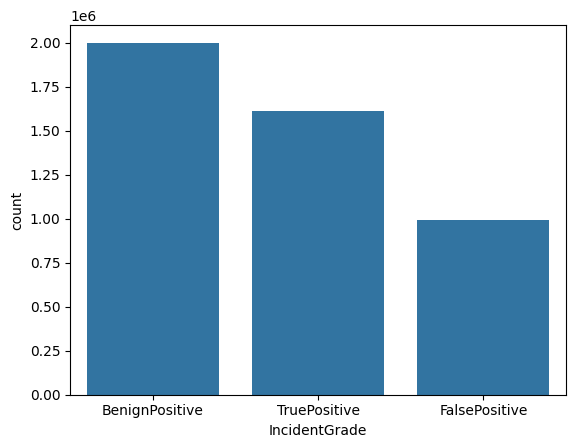

In [56]:
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=data_tr1)
plt.show()

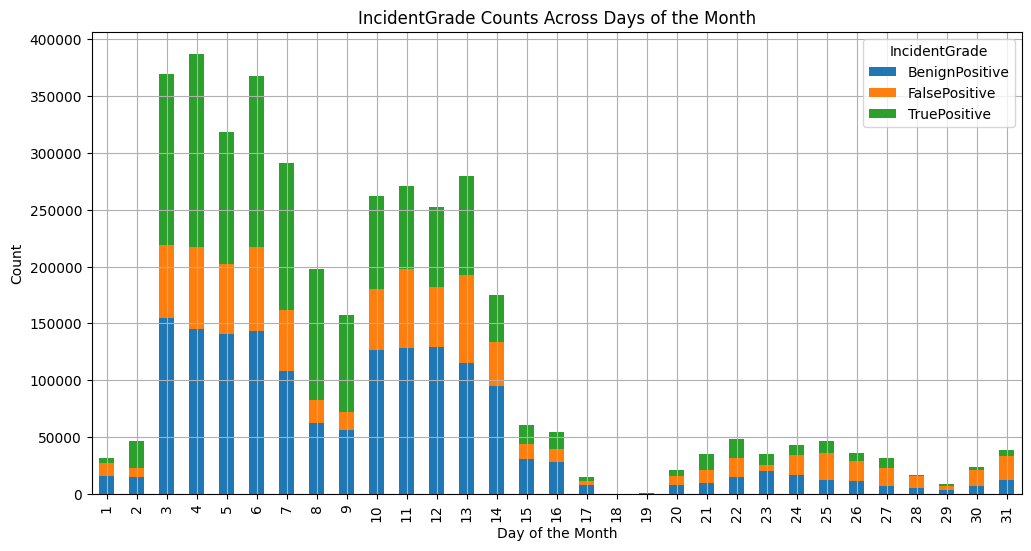

In [58]:
# Aggregate data
day_incident_grade = data_ts.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

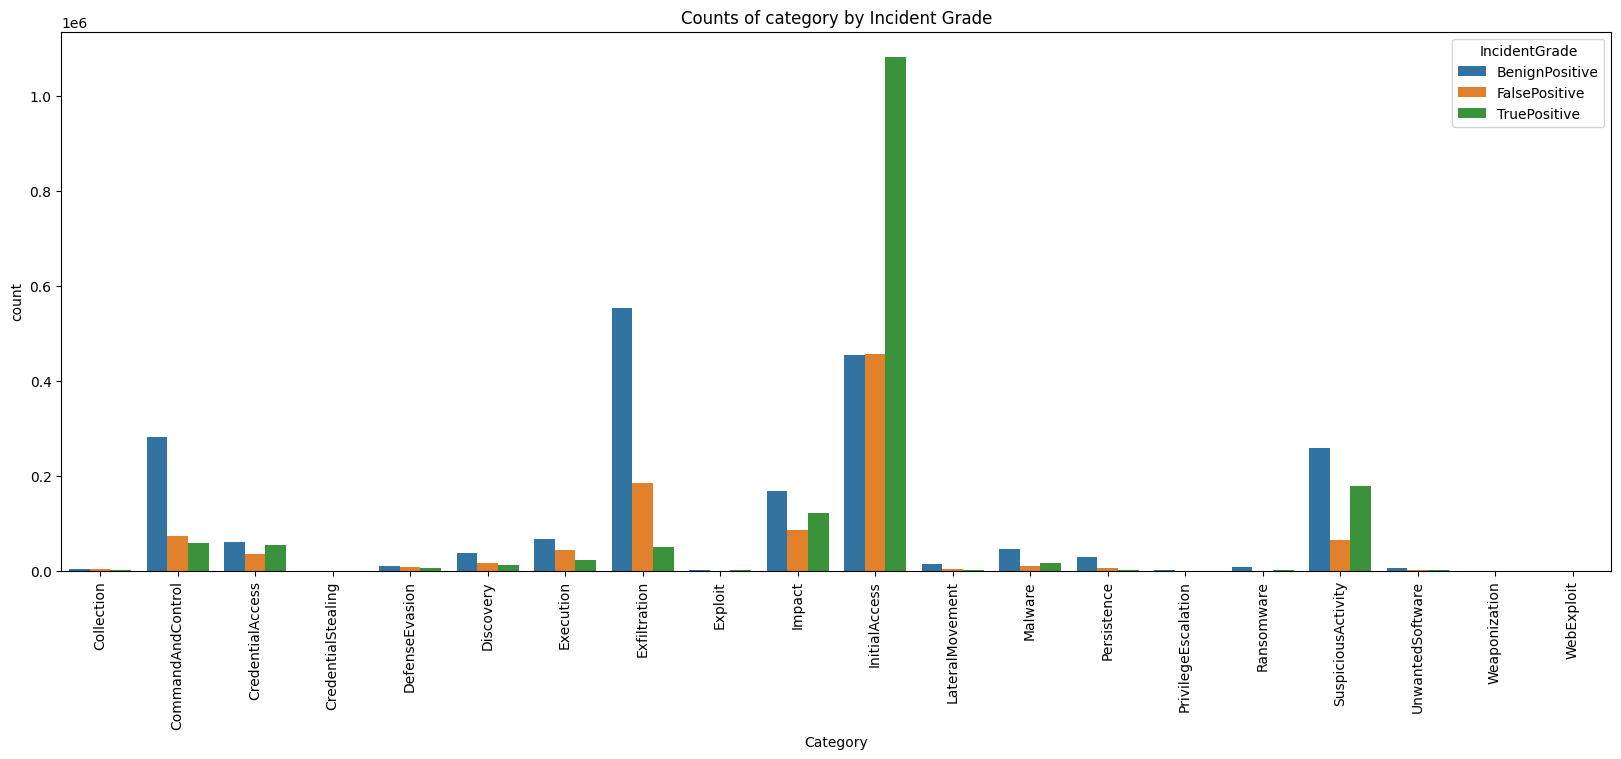

In [59]:
# Aggregate data
grouped_data=data_tr1.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show()

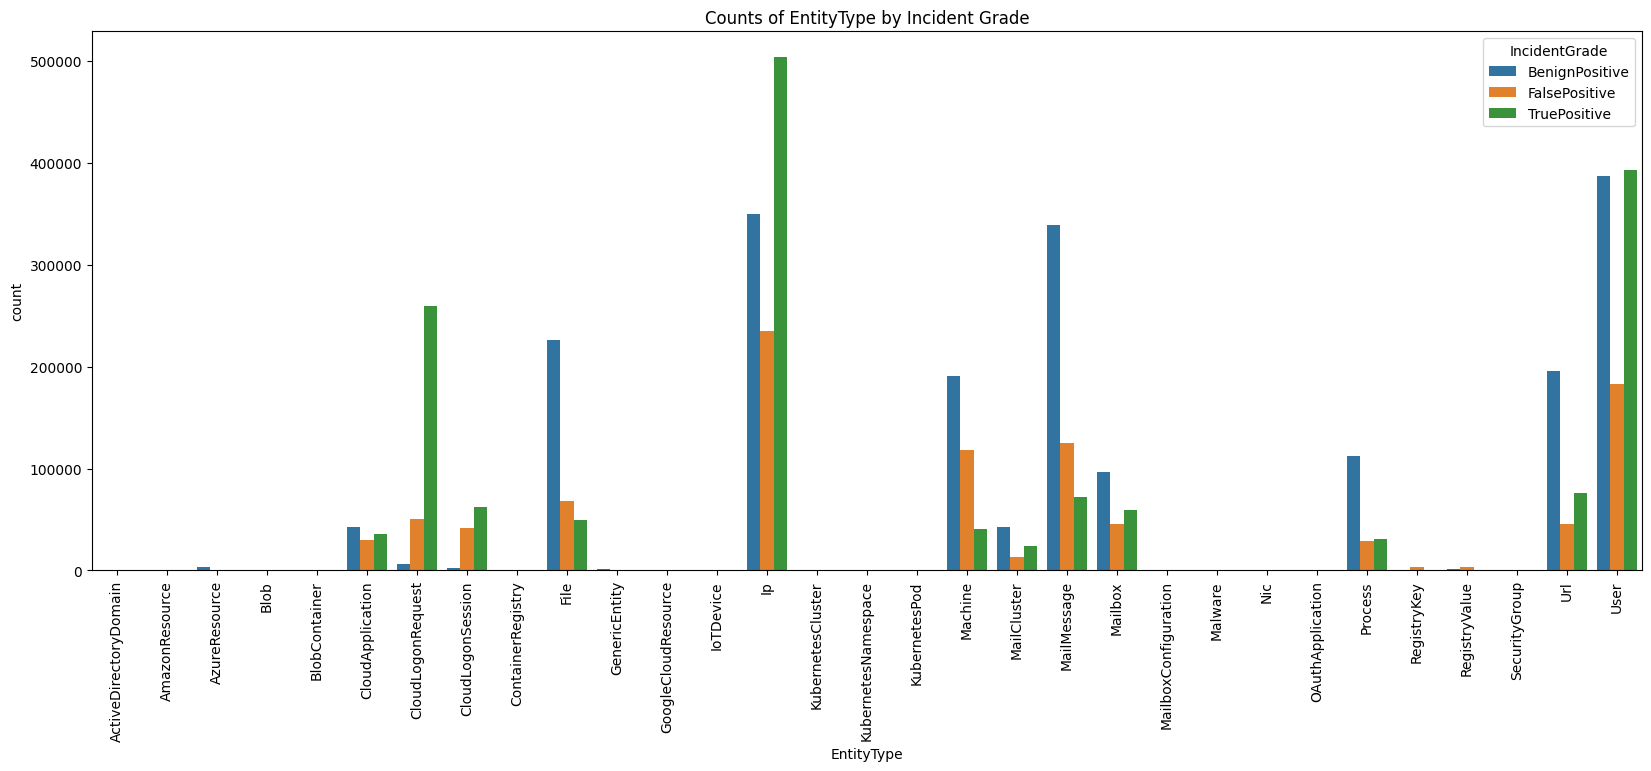

In [60]:
#Aggregate data
grouped_data=data_tr1.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of EntityType by Incident Grade")
plt.show()


In [ ]:
# dropping 70% below correlated columns
data_tr1.drop(["Month","DeviceName","DeviceId","ResourceIdName","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)

In [ ]:
# dropping 70% below correlated columns
data_ts.drop(["Month","DeviceName","DeviceId","ResourceIdName","OAuthApplicationId","NetworkMessageId","Usage"], axis =1 , inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15292\46670893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ts.drop(["Month","DeviceName","DeviceId","ResourceIdName","OAuthApplicationId","NetworkMessageId","Usage"], axis =1 , inplace = True)


In [69]:
data_tr1.count()

Id                   4602224
OrgId                4602224
IncidentId           4602224
AlertId              4602224
DetectorId           4602224
AlertTitle           4602224
Category             4602224
IncidentGrade        4602224
EntityType           4602224
EvidenceRole         4602224
Sha256               4602224
IpAddress            4602224
Url                  4602224
AccountSid           4602224
AccountUpn           4602224
AccountObjectId      4602224
AccountName          4602224
RegistryKey          4602224
RegistryValueName    4602224
RegistryValueData    4602224
ApplicationId        4602224
ApplicationName      4602224
FileName             4602224
FolderPath           4602224
OSFamily             4602224
OSVersion            4602224
CountryCode          4602224
State                4602224
City                 4602224
Day                  4602224
Year                 4602224
Hour                 4602224
Time                 4602224
dtype: int64

In [ ]:
#correlation and feature selection

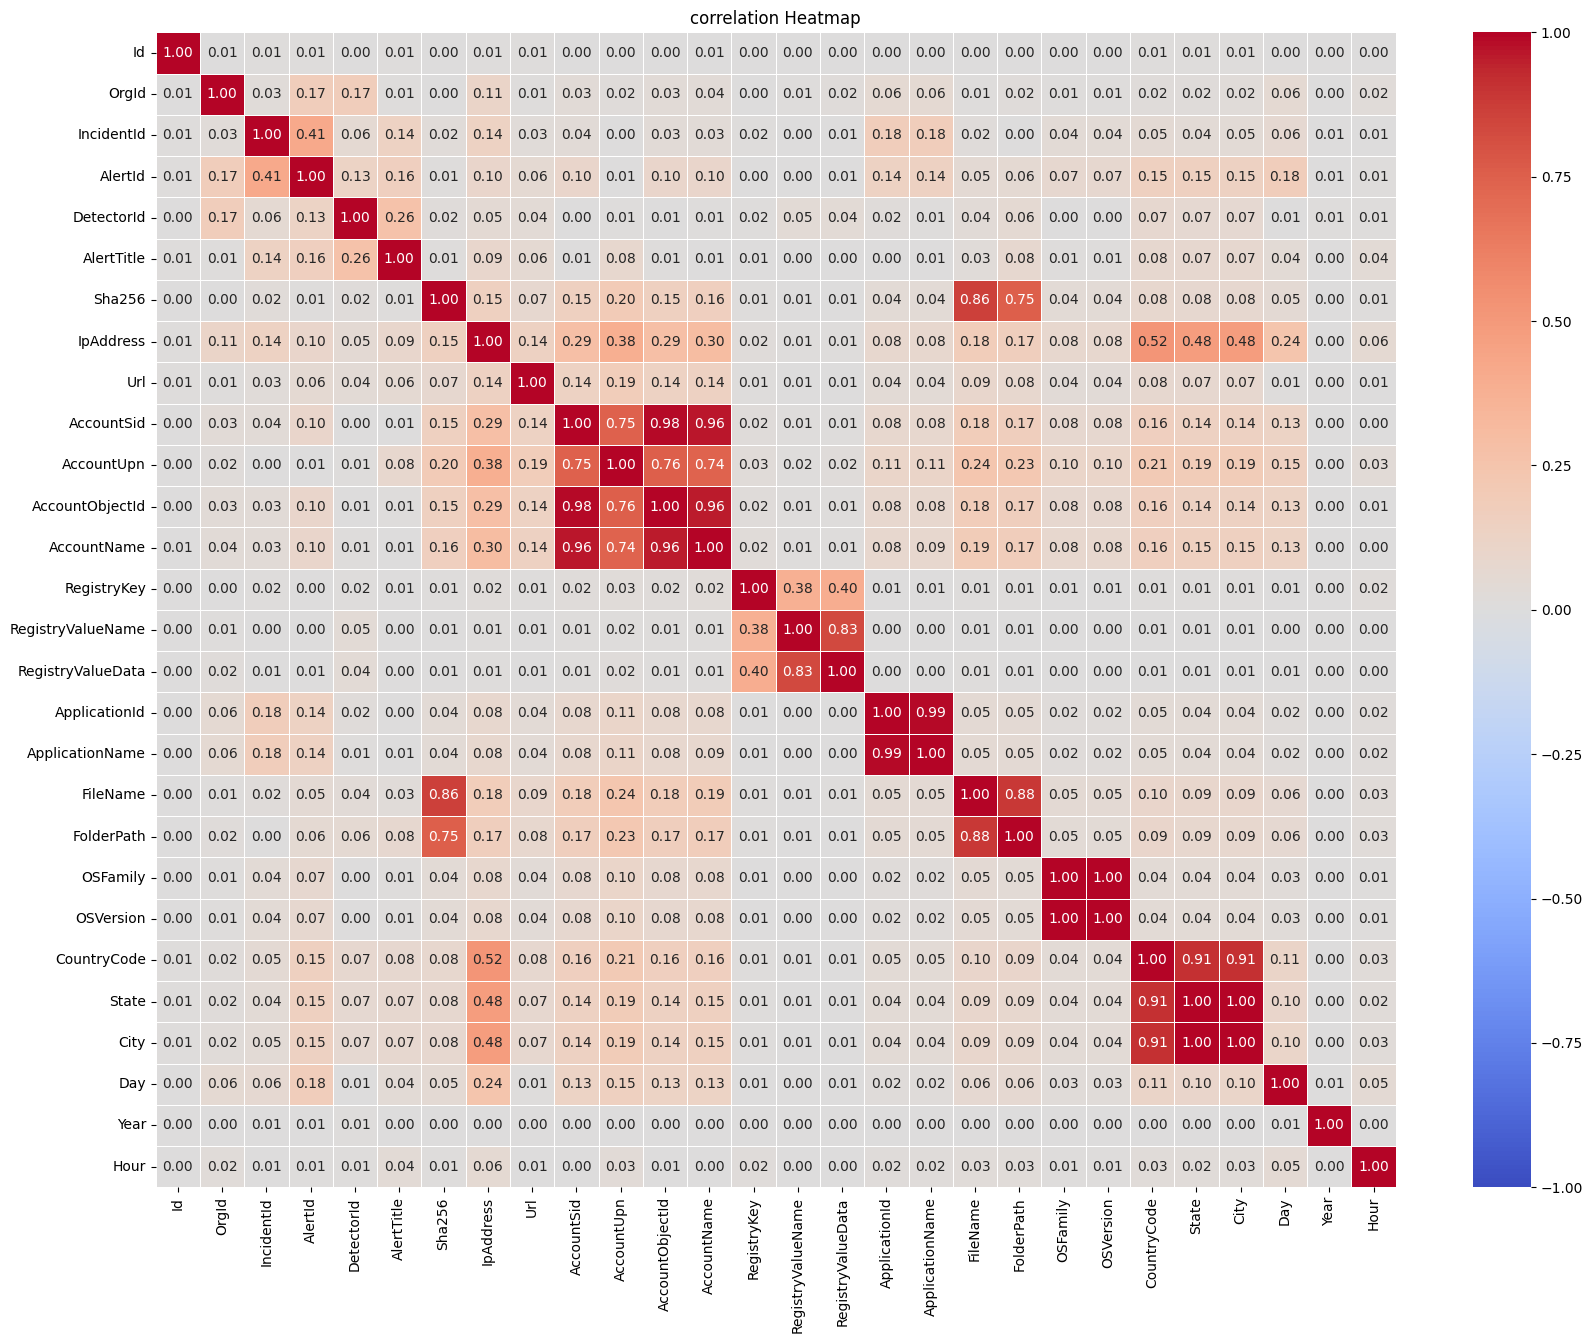

In [70]:
# selecting numerical col
numeric_df=data_tr1.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

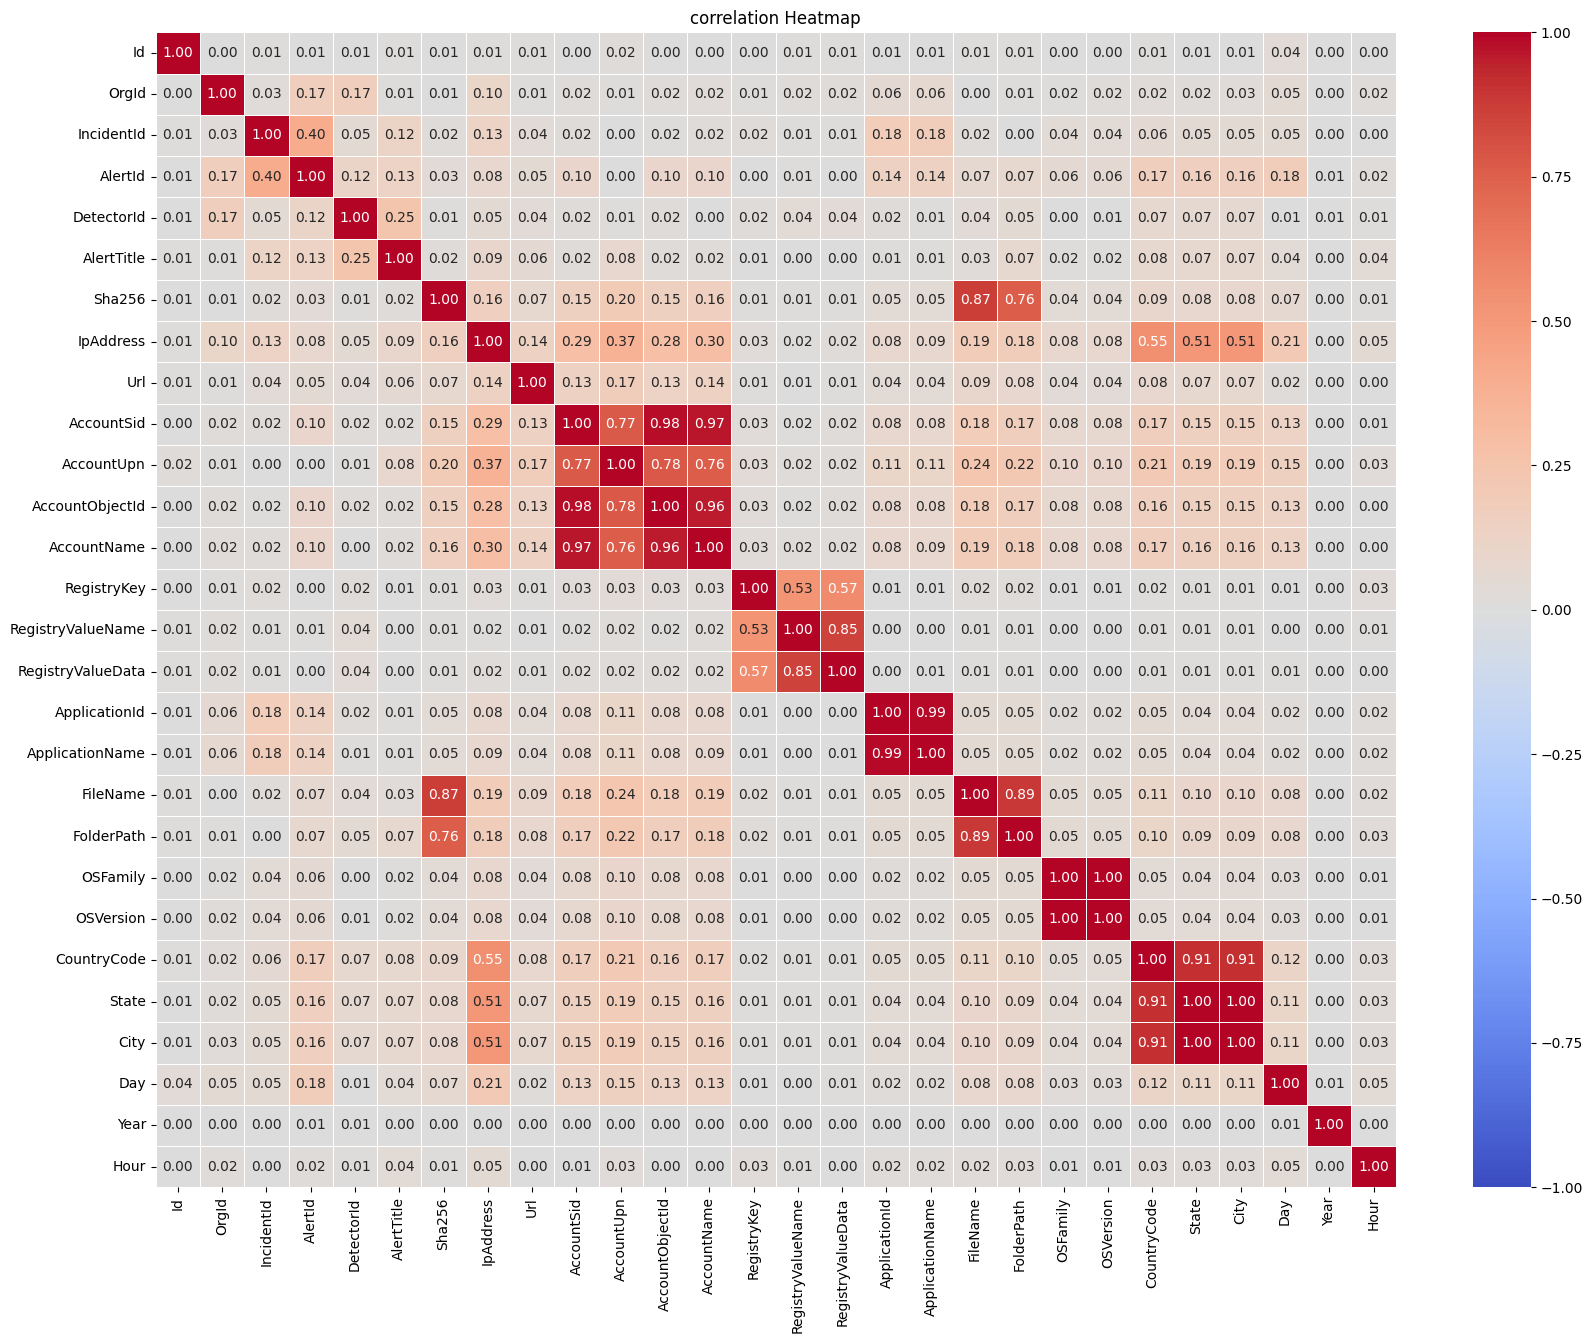

In [71]:
# selecting numerical col
numeric_df=data_ts.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [73]:
# dropping 70% below correlated columns
data_tr1.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid",
               "AccountObjectId","FolderPath","AccountUpn",
               "RegistryKey","RegistryValueData","DetectorId","Id",
               "OSFamily","OSVersion",'State','FileName','AccountName'], axis =1 , inplace = True)

In [74]:
# dropping 70% below correlated columns
data_ts.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid",
               "AccountObjectId","FolderPath","AccountUpn",
               "RegistryKey","RegistryValueData","DetectorId","Id",
               "OSFamily","OSVersion",'State','FileName','AccountName'], axis =1 , inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15292\549498747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ts.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid",


In [75]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4602224 entries, 0 to 4758417
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   OrgId          int64 
 1   IncidentId     int64 
 2   AlertId        int64 
 3   AlertTitle     int64 
 4   Category       object
 5   IncidentGrade  object
 6   EntityType     object
 7   EvidenceRole   object
 8   IpAddress      int64 
 9   Url            int64 
 10  ApplicationId  int64 
 11  City           int64 
 12  Day            int32 
 13  Year           int32 
 14  Hour           int32 
 15  Time           object
dtypes: int32(3), int64(8), object(5)
memory usage: 544.2+ MB


In [85]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922695 entries, 0 to 4147990
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   OrgId          int64 
 1   IncidentId     int64 
 2   AlertId        int64 
 3   AlertTitle     int64 
 4   Category       object
 5   IncidentGrade  object
 6   EntityType     object
 7   EvidenceRole   object
 8   IpAddress      int64 
 9   Url            int64 
 10  ApplicationId  int64 
 11  City           int64 
 12  Day            int32 
 13  Year           int32 
 14  Hour           int32 
 15  Time           object
dtypes: int32(3), int64(8), object(5)
memory usage: 463.9+ MB


In [77]:
data_tr1.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [84]:
data_ts.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [78]:
Categorical_coltr=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time']

In [ ]:
#LABEL ENCODER

In [79]:
encoders = {}
for i in Categorical_coltr:
    le = LabelEncoder()
    data_tr1[i]=le.fit_transform(data_tr1[i])
    encoders[i]=le

In [86]:
encoders = {}
for i in Categorical_coltr:
    le = LabelEncoder()
    data_ts[i]=le.fit_transform(data_ts[i])
    encoders[i]=le

C:\Users\HP\AppData\Local\Temp\ipykernel_15292\105156207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ts[i]=le.fit_transform(data_ts[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_15292\105156207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ts[i]=le.fit_transform(data_ts[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_15292\105156207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [80]:
data_tr1

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,26,18583,687462,813,12,0,9,1,360606,160396,2251,10630,6,2024,5,21407
1,33,5065,3990,25,9,0,17,0,360606,160396,2251,10630,3,2024,10,38709
2,201,150787,807590,444,6,0,17,0,360606,160396,2251,10630,13,2024,3,13000
3,204,108287,28575,1233,16,2,9,1,360606,160396,2251,10630,8,2024,16,60897
4,54,528202,1458226,58829,7,0,9,0,360606,160396,2251,10630,9,2024,2,10081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,142,93987,15739,7836,7,1,19,0,360606,160396,2251,10630,10,2024,10,37517
4758414,36,1001,257479,2,1,1,30,0,360606,160396,2251,10630,11,2024,19,70252
4758415,851,31194,1518250,1,10,0,19,1,360606,160396,2251,10630,9,2024,4,16061
4758416,12,2419,1203,1334,9,0,13,1,546,160396,2251,10630,21,2024,23,82871


In [87]:
data_ts

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,657,11767,87199,563,11,0,28,0,360606,160396,2251,10630,4,2024,22,82520
1,3,91158,632273,2,1,0,15,0,360606,160396,2251,10630,3,2024,12,46649
2,145,32247,131719,10807,11,0,23,1,360606,160396,2251,10630,8,2024,3,12037
3,222,15294,917686,0,10,1,7,1,360606,160396,2251,10630,12,2024,12,43594
4,363,7615,5944,18,5,0,28,0,360606,160396,2251,10630,6,2024,17,63665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,42,391,638112,7322,12,0,15,0,360606,160396,2251,10630,3,2024,20,73420
4147987,262,3017,227156,120,10,0,28,0,360606,160396,2251,10630,4,2024,3,13978
4147988,1323,31001,304819,196,10,0,28,0,360606,160396,2251,10630,4,2024,19,70279
4147989,47,3653,7243,29,1,1,12,1,1084,160396,2251,10630,15,2024,0,3020


In [81]:
data_tr1.select_dtypes(include=["int32", "int64","float64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'ApplicationId', 'City', 'Day', 'Year', 'Hour', 'Time'],
      dtype='object')

In [88]:
data_ts.select_dtypes(include=["int32", "int64","float64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'ApplicationId', 'City', 'Day', 'Year', 'Hour', 'Time'],
      dtype='object')

In [89]:

# Separate features (X) and target (y)
X_train = data_tr1.drop(columns=['IncidentGrade'])
y_train = data_tr1['IncidentGrade']

X_test = data_ts.drop(columns=['IncidentGrade'])
y_test = data_ts['IncidentGrade']

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print("\nClassification Report (Training):")
print(classification_report(y_train, y_pred_train))

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_pred_test))



Training Metrics:
Accuracy: 1.00

Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1998767
           1       1.00      1.00      1.00    994500
           2       1.00      1.00      1.00   1608957

    accuracy                           1.00   4602224
   macro avg       1.00      1.00      1.00   4602224
weighted avg       1.00      1.00      1.00   4602224


Testing Metrics:
Accuracy: 0.91

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.89      0.92      0.91   1630942
           1       0.90      0.84      0.87    868897
           2       0.92      0.93      0.92   1422856

    accuracy                           0.91   3922695
   macro avg       0.91      0.90      0.90   3922695
weighted avg       0.91      0.91      0.91   3922695

